# HUtil: Basic Usage Examples

This notebook demonstrates the basic usage of the `hutil` package for working with HEALPix datasets in xarray. We'll show how to use the package both with direct function calls and with the xarray accessor.

## Setup

First, let's import the necessary packages and create a simple HEALPix dataset for demonstration.

In [1]:
import numpy as np
import xarray as xr
import healpy as hp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Import hutil
import hutil
from hutil import selection

In [2]:
# Create a simple HEALPix dataset for demonstration
nside = 32  # Lower resolution for faster computation
npix = hp.nside2npix(nside)
nest = True

# Create some test data - a temperature field with a hotspot
lats, lons = hp.pix2ang(nside, np.arange(npix), nest=nest, lonlat=True)

# Create a temperature field with a hotspot at (0, 0)
hotspot_lat, hotspot_lon = 0, 0
dist = np.sqrt((lats - hotspot_lat)**2 + (lons - hotspot_lon)**2)
temperature = 20 + 10 * np.exp(-dist**2 / 1000)  # Base temperature + hotspot

# Create a dataset
ds = xr.Dataset(
    data_vars={
        'temperature': ('cell', temperature),
        'humidity': ('cell', 50 + 20 * np.sin(np.radians(lats)))  # Humidity varies with latitude
    },
    coords={
        'cell': np.arange(npix)
    },
    attrs={
        'nside': nside,
        'nest': nest
    }
)

print(f'Created HEALPix dataset with nside={nside}, npix={npix}')
ds

Created HEALPix dataset with nside=32, npix=12288


<xarray.Dataset> Size: 295kB
Dimensions:      (cell: 12288)
Coordinates:
  * cell         (cell) int64 98kB 0 1 2 3 4 5 ... 12283 12284 12285 12286 12287
Data variables:
    temperature  (cell) float64 98kB 21.32 21.15 21.49 21.3 ... 20.0 20.0 20.0
    humidity     (cell) float64 98kB 64.14 64.48 63.79 ... 36.21 35.52 35.86
Attributes:
    nside:    32
    nest:     True

## Method 1: Using Direct Function Calls

First, let's demonstrate how to use the hutil functions directly.

In [3]:
# Get HEALPix information from the dataset
nside, nest, npix = selection.get_healpix_info(ds)
print(f'HEALPix info: nside={nside}, nest={nest}, npix={npix}')

HEALPix info: nside=32, nest=True, npix=12288


/home/suvarchal/hk25/hutil/hutil/selection.py:54: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  npix = ds.dims.get('cell')
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


In [4]:
# Add latitude and longitude coordinates to the dataset
ds_with_latlon = selection.add_latlon_coords(ds)
print('Added lat/lon coordinates to dataset')
ds_with_latlon

Added lat/lon coordinates to dataset


/home/suvarchal/hk25/hutil/hutil/selection.py:90: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  pixel_indices = np.arange(ds.dims['cell'])


<xarray.Dataset> Size: 492kB
Dimensions:      (cell: 12288)
Coordinates:
  * cell         (cell) int64 98kB 0 1 2 3 4 5 ... 12283 12284 12285 12286 12287
    lat          (cell) float64 98kB 1.194 2.388 2.388 ... -2.388 -2.388 -1.194
    lon          (cell) float64 98kB 45.0 46.41 43.59 ... -43.59 -46.41 -45.0
Data variables:
    temperature  (cell) float64 98kB 21.32 21.15 21.49 21.3 ... 20.0 20.0 20.0
    humidity     (cell) float64 98kB 64.14 64.48 63.79 ... 36.21 35.52 35.86
Attributes:
    nside:    32
    nest:     True

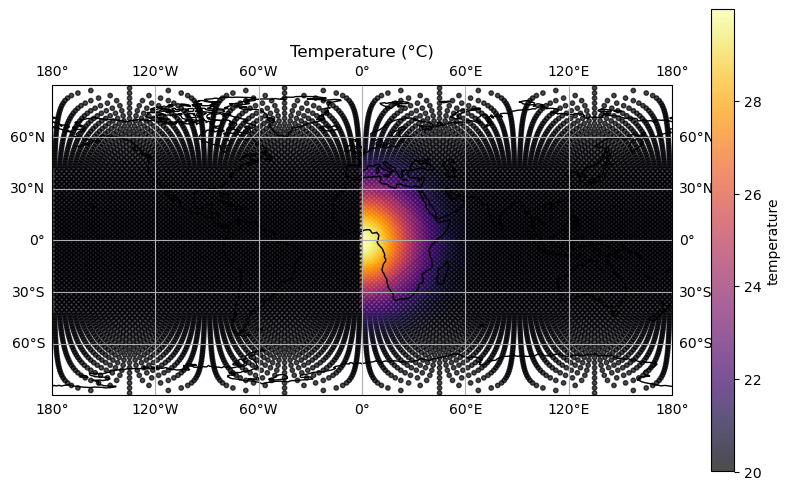

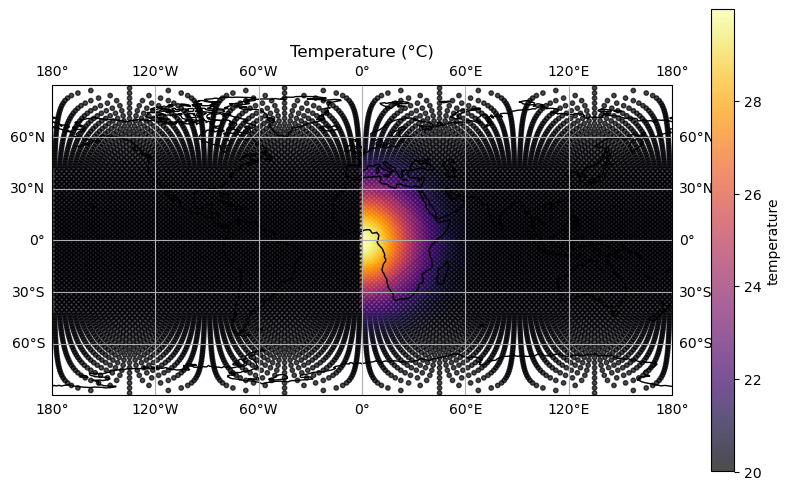

In [5]:
# Plot the original dataset
selection.plot_healpix_selection(ds_with_latlon, title='Temperature (°C)', cmap='inferno')

### Selecting Data at a Specific Latitude

Let's select data along the equator (latitude = 0°).

Selected 384 points at the equator


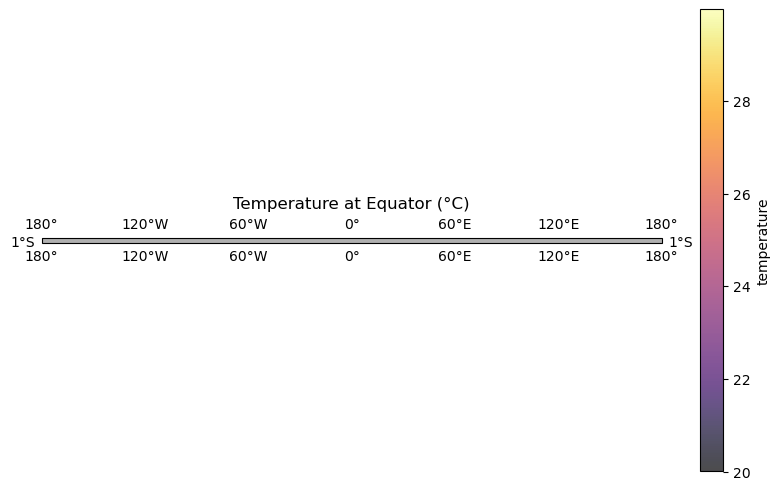

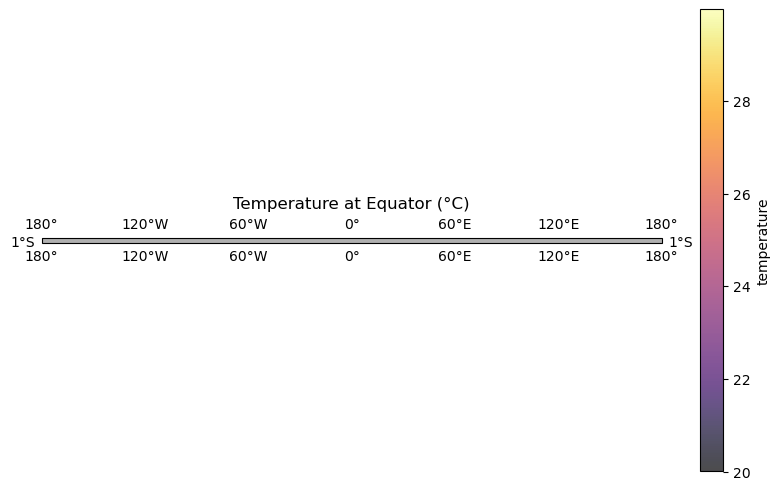

In [6]:
# Select data at the equator (latitude = 0°)
equator_data = selection.select_at_latitude(ds_with_latlon, latitude=0, tolerance=2.0)
print(f'Selected {len(equator_data.cell)} points at the equator')

# Plot the selected data
selection.plot_healpix_selection(equator_data, title='Temperature at Equator (°C)', cmap='inferno')

### Selecting Data at a Specific Longitude

Now let's select data along the prime meridian (longitude = 0°).

Selected 134 points at the prime meridian


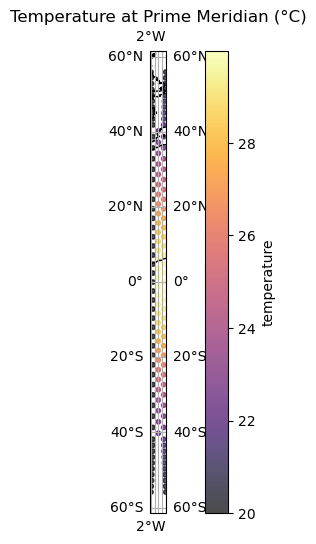

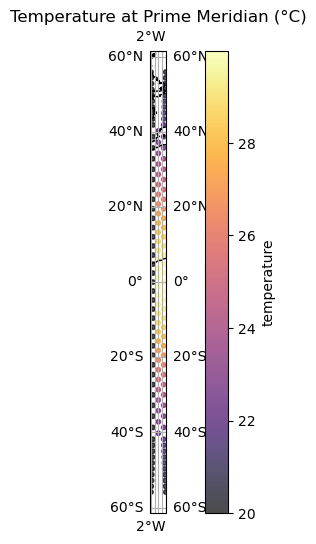

In [7]:
# Select data at the prime meridian (longitude = 0°)
meridian_data = selection.select_at_longitude(ds_with_latlon, longitude=0, tolerance=2.0)
print(f'Selected {len(meridian_data.cell)} points at the prime meridian')

# Plot the selected data
selection.plot_healpix_selection(meridian_data, title='Temperature at Prime Meridian (°C)', cmap='inferno')

### Selecting Data at Specific Points

Let's select data at specific latitude/longitude points.

Selected 5 points


/home/suvarchal/hk25/hutil/hutil/selection.py:54: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  npix = ds.dims.get('cell')
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


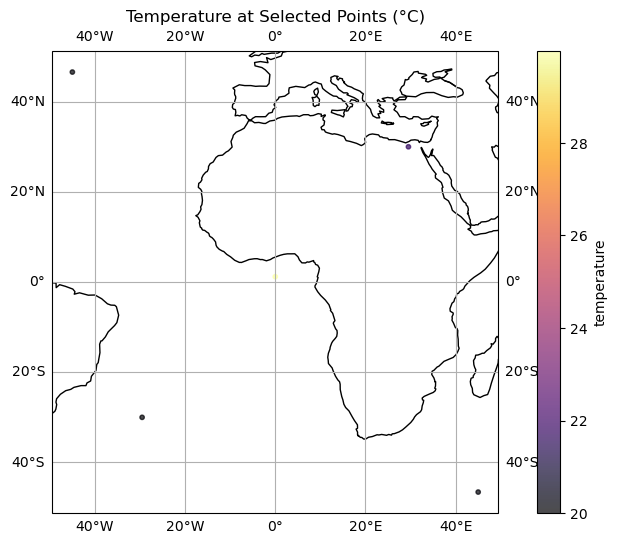

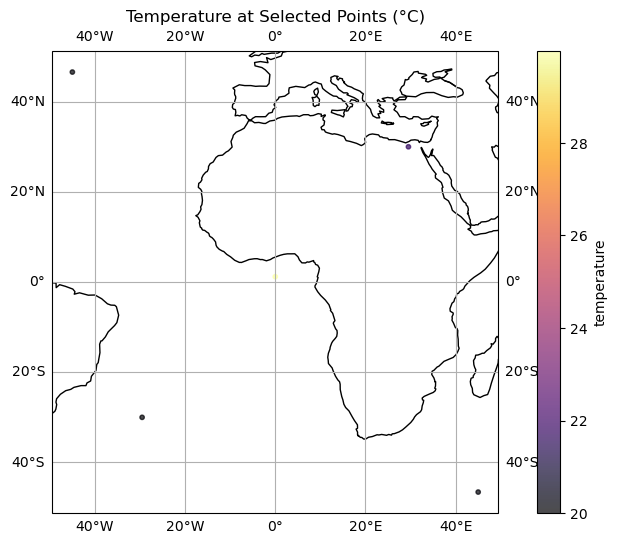

In [8]:
# Define some points of interest
points = [(0, 0), (30, 30), (-30, -30), (45, -45), (-45, 45)]

# Select data at these points
point_data = selection.select_at_points(ds_with_latlon, points)
print(f'Selected {len(point_data.cell)} points')

# Plot the selected data
selection.plot_healpix_selection(point_data, title='Temperature at Selected Points (°C)', cmap='inferno')

### Selecting Data in a Region

Let's select data within a rectangular region.

/home/suvarchal/hk25/hutil/hutil/selection.py:283: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  mask = xr.DataArray(np.zeros(ds.dims['cell'], dtype=bool), dims=['cell'], coords={'cell': ds.cell})


Selected 575 points in the region


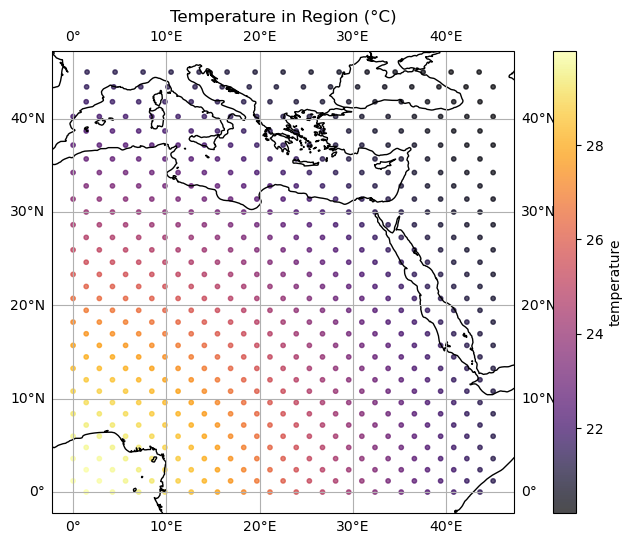

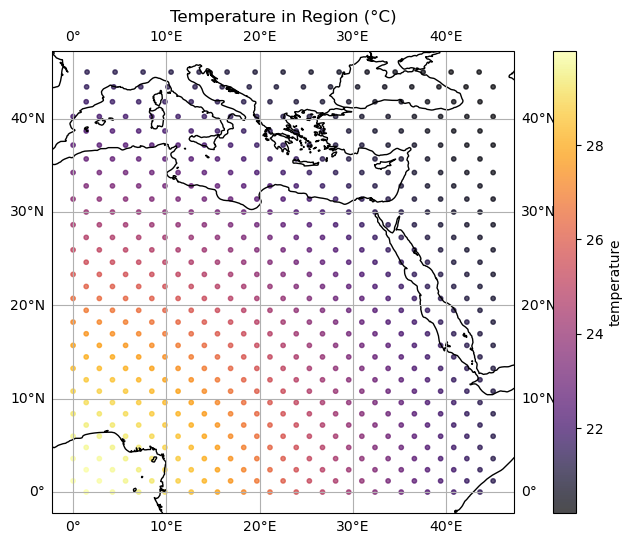

In [9]:
# Select data in a rectangular region
region_data = selection.select_region(
    ds_with_latlon,
    lat_min=0, lat_max=45,
    lon_min=0, lon_max=45
)
print(f'Selected {len(region_data.cell)} points in the region')

# Plot the selected data
selection.plot_healpix_selection(region_data, title='Temperature in Region (°C)', cmap='inferno')

### Selecting Data within a Polygon

Let's select data within a polygon.

/home/suvarchal/hk25/hutil/hutil/selection.py:283: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  mask = xr.DataArray(np.zeros(ds.dims['cell'], dtype=bool), dims=['cell'], coords={'cell': ds.cell})


Selected 126 points within the polygon


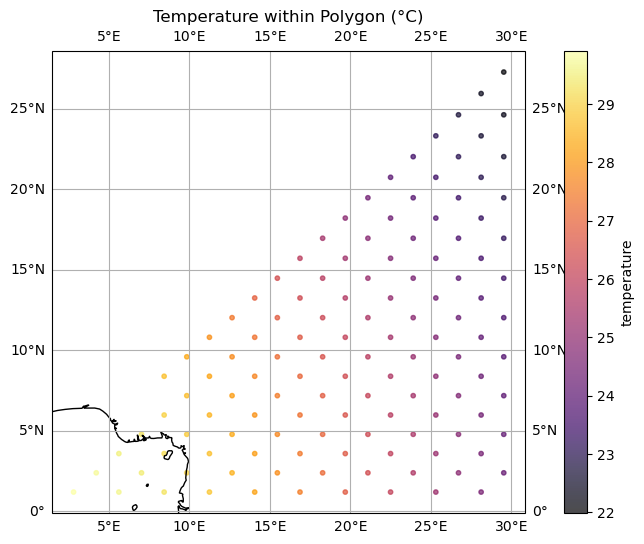

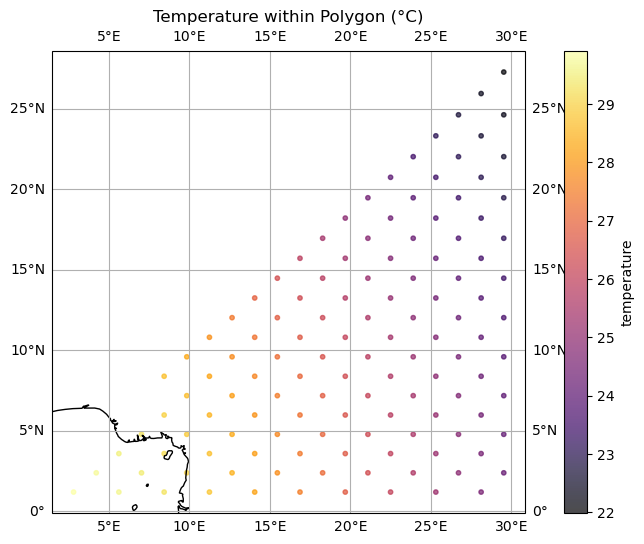

In [10]:
# Define a polygon (triangle)
polygon = [(0, 0), (30, 30), (0, 30)]

# Select data within the polygon
polygon_data = selection.select_within_polygon(ds_with_latlon, polygon)
print(f'Selected {len(polygon_data.cell)} points within the polygon')

# Plot the selected data
selection.plot_healpix_selection(polygon_data, title='Temperature within Polygon (°C)', cmap='inferno')

### Interpolating to a Regular Grid

Let's interpolate the HEALPix data to a regular lat/lon grid.

/home/suvarchal/hk25/hutil/hutil/selection.py:54: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  npix = ds.dims.get('cell')
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


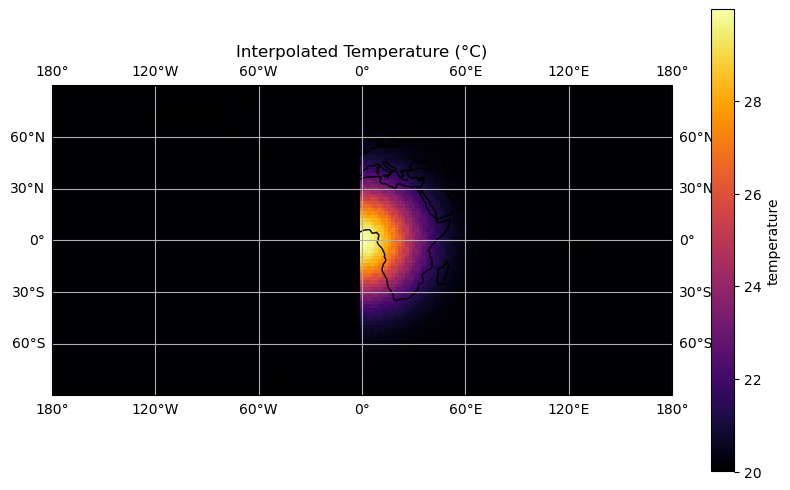

In [11]:
# Interpolate temperature to a regular grid
grid_data = selection.interpolate_to_grid(
    ds_with_latlon, 
    var_name='temperature',
    lat_res=2.0, lon_res=2.0,
    method='nearest'
)

# Plot the interpolated data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = grid_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='inferno')
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.title('Interpolated Temperature (°C)')
plt.show()

### Using the Smart Select Function

The `select` function automatically chooses the appropriate selection method based on the input parameters.

In [12]:
# Select at a latitude
lat_data = selection.select(ds_with_latlon, lat=0)
print(f'Selected {len(lat_data.cell)} points at latitude 0°')

# Select at a longitude
lon_data = selection.select(ds_with_latlon, lon=0)
print(f'Selected {len(lon_data.cell)} points at longitude 0°')

# Select at a point
point_data = selection.select(ds_with_latlon, lat=0, lon=0)
print(f'Selected {len(point_data.cell)} points at (0°, 0°)')

# Select a region
region_data = selection.select(ds_with_latlon, lat=slice(0, 45), lon=slice(0, 45))
print(f'Selected {len(region_data.cell)} points in region')

Selected 128 points at latitude 0°
Selected 32 points at longitude 0°


/home/suvarchal/hk25/hutil/hutil/selection.py:54: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  npix = ds.dims.get('cell')
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


TypeError: len() of unsized object

## Method 2: Using the xarray Accessor

Now let's demonstrate how to use the hutil accessor with xarray datasets.

In [13]:
# Get HEALPix information using the accessor
nside, nest, npix = ds.hutil.get_info()
print(f'HEALPix info: nside={nside}, nest={nest}, npix={npix}')

HEALPix info: nside=32, nest=True, npix=12288


In [14]:
# Add latitude and longitude coordinates using the accessor
ds_accessor = ds.hutil.add_latlon_coords()
print('Added lat/lon coordinates to dataset using accessor')
ds_accessor

Added lat/lon coordinates to dataset using accessor


/home/suvarchal/hk25/hutil/hutil/selection.py:90: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  pixel_indices = np.arange(ds.dims['cell'])


<xarray.Dataset> Size: 492kB
Dimensions:      (cell: 12288)
Coordinates:
  * cell         (cell) int64 98kB 0 1 2 3 4 5 ... 12283 12284 12285 12286 12287
    lat          (cell) float64 98kB 1.194 2.388 2.388 ... -2.388 -2.388 -1.194
    lon          (cell) float64 98kB 45.0 46.41 43.59 ... -43.59 -46.41 -45.0
Data variables:
    temperature  (cell) float64 98kB 21.32 21.15 21.49 21.3 ... 20.0 20.0 20.0
    humidity     (cell) float64 98kB 64.14 64.48 63.79 ... 36.21 35.52 35.86
Attributes:
    nside:    32
    nest:     True

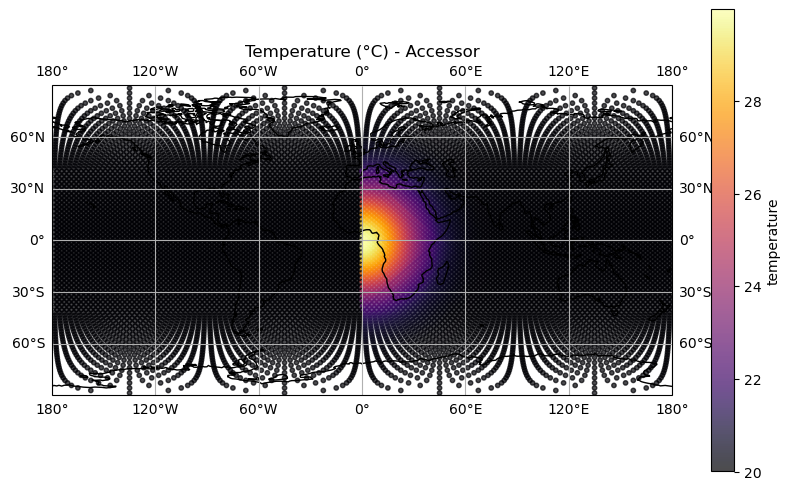

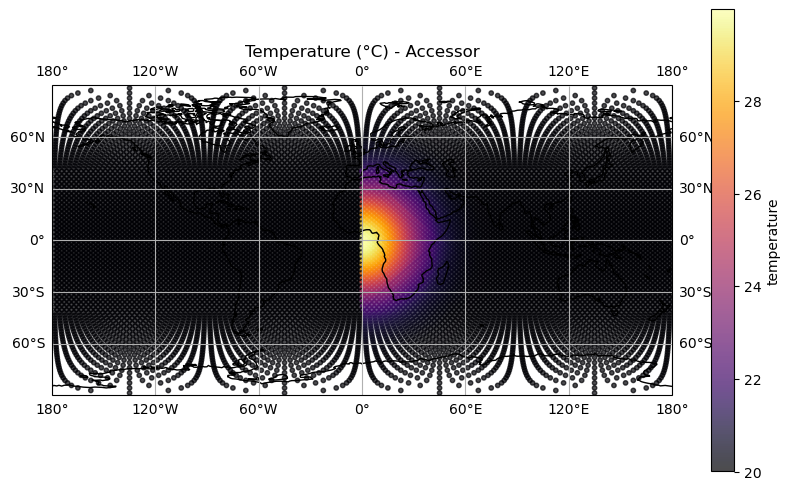

In [15]:
# Plot the dataset using the accessor
ds_accessor.hutil.plot(title='Temperature (°C) - Accessor', cmap='inferno')

### Selecting Data at a Specific Latitude

Let's select data along the equator using the accessor.

Selected 384 points at the equator


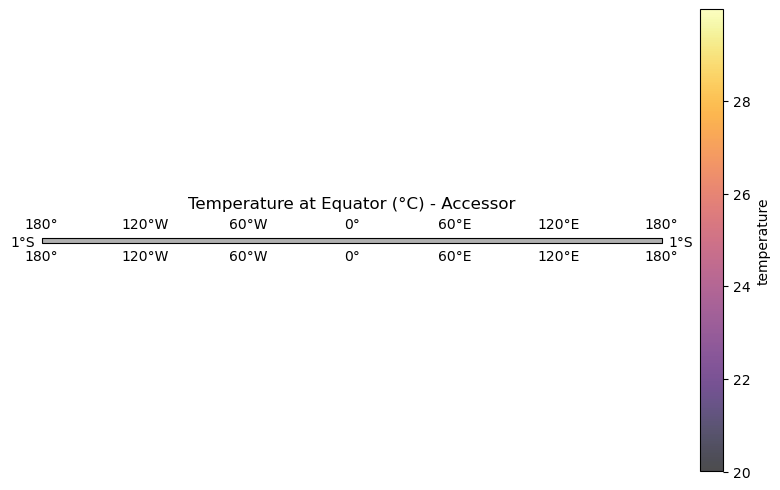

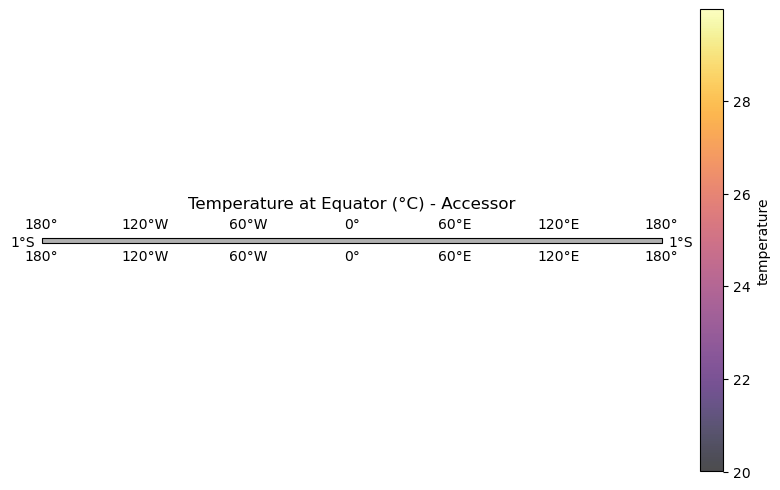

In [16]:
# Select data at the equator using the accessor
equator_data = ds_accessor.hutil.select_at_latitude(latitude=0, tolerance=2.0)
print(f'Selected {len(equator_data.cell)} points at the equator')

# Plot the selected data using the accessor
equator_data.hutil.plot(title='Temperature at Equator (°C) - Accessor', cmap='inferno')

### Selecting Data at a Specific Longitude

Now let's select data along the prime meridian using the accessor.

Selected 134 points at the prime meridian


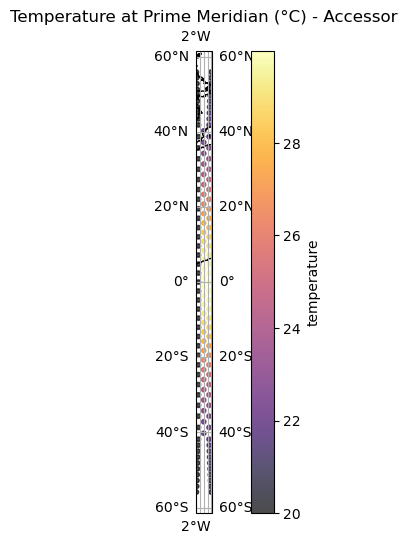

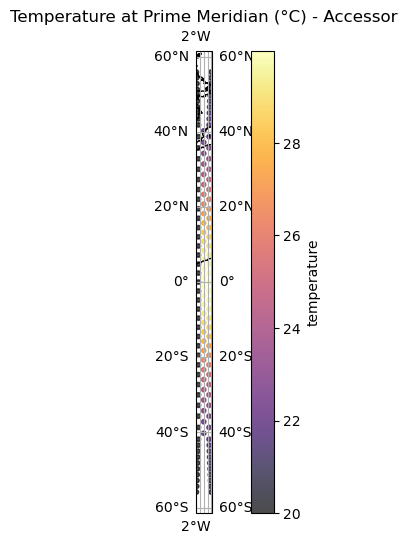

In [17]:
# Select data at the prime meridian using the accessor
meridian_data = ds_accessor.hutil.select_at_longitude(longitude=0, tolerance=2.0)
print(f'Selected {len(meridian_data.cell)} points at the prime meridian')

# Plot the selected data using the accessor
meridian_data.hutil.plot(title='Temperature at Prime Meridian (°C) - Accessor', cmap='inferno')

### Selecting Data at Specific Points

Let's select data at specific latitude/longitude points using the accessor.

Selected 5 points


/home/suvarchal/hk25/hutil/hutil/selection.py:54: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  npix = ds.dims.get('cell')
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


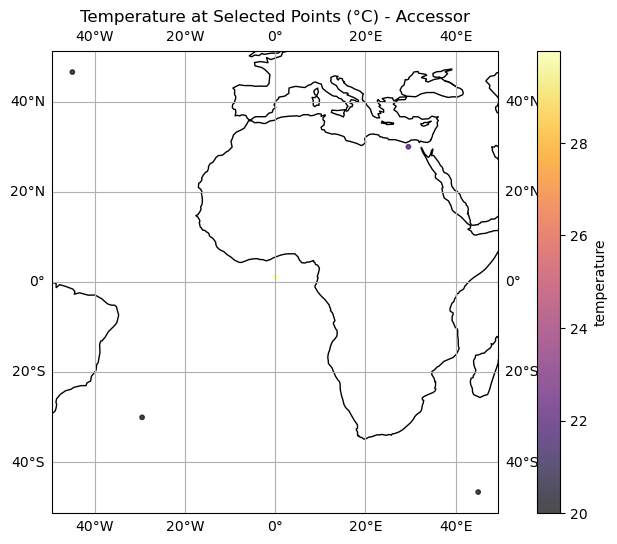

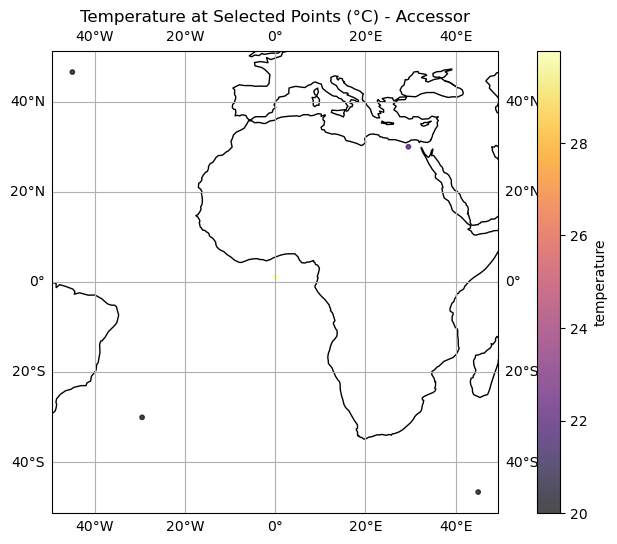

In [18]:
# Define some points of interest
points = [(0, 0), (30, 30), (-30, -30), (45, -45), (-45, 45)]

# Select data at these points using the accessor
point_data = ds_accessor.hutil.select_at_points(points)
print(f'Selected {len(point_data.cell)} points')

# Plot the selected data using the accessor
point_data.hutil.plot(title='Temperature at Selected Points (°C) - Accessor', cmap='inferno')

### Selecting Data in a Region

Let's select data within a rectangular region using the accessor.

Selected 575 points in the region


/home/suvarchal/hk25/hutil/hutil/selection.py:283: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  mask = xr.DataArray(np.zeros(ds.dims['cell'], dtype=bool), dims=['cell'], coords={'cell': ds.cell})


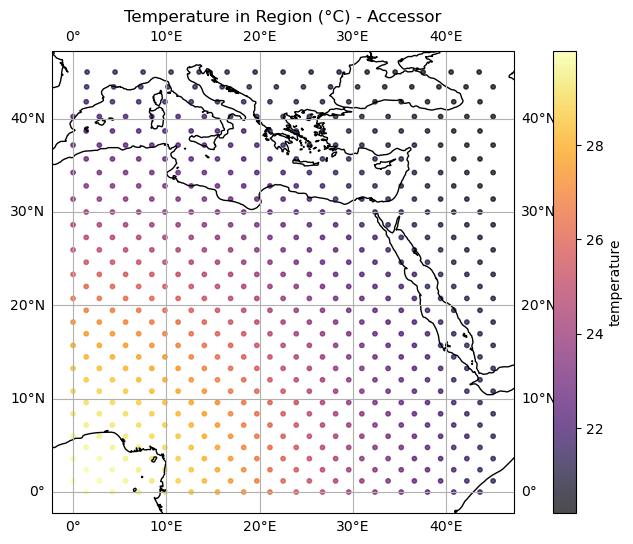

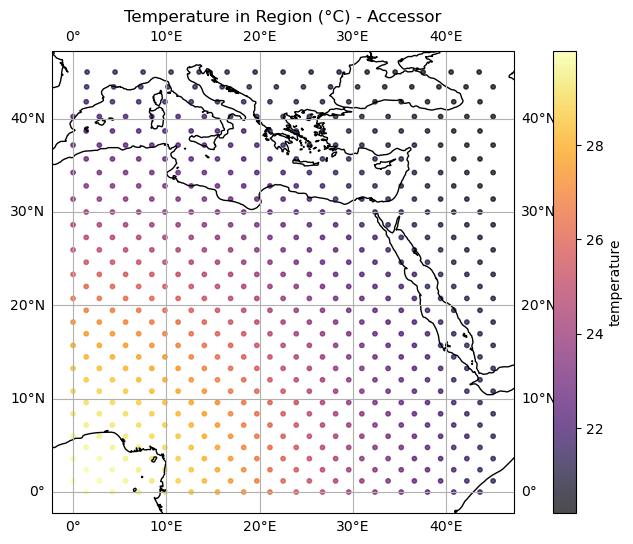

In [19]:
# Select data in a rectangular region using the accessor
region_data = ds_accessor.hutil.select_region(
    lat_min=0, lat_max=45,
    lon_min=0, lon_max=45
)
print(f'Selected {len(region_data.cell)} points in the region')

# Plot the selected data using the accessor
region_data.hutil.plot(title='Temperature in Region (°C) - Accessor', cmap='inferno')

### Selecting Data within a Polygon

Let's select data within a polygon using the accessor.

/home/suvarchal/hk25/hutil/hutil/selection.py:283: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  mask = xr.DataArray(np.zeros(ds.dims['cell'], dtype=bool), dims=['cell'], coords={'cell': ds.cell})


Selected 126 points within the polygon


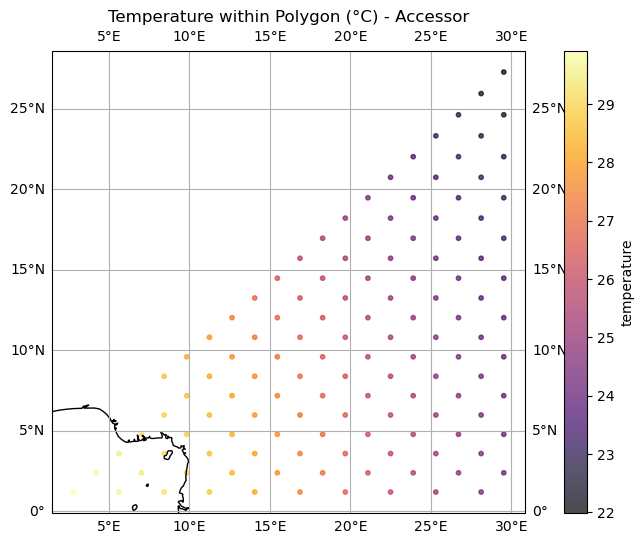

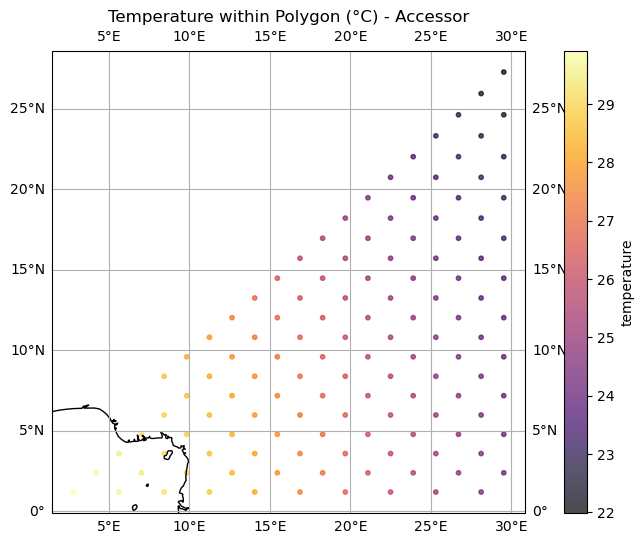

In [20]:
# Define a polygon (triangle)
polygon = [(0, 0), (30, 30), (0, 30)]

# Select data within the polygon using the accessor
polygon_data = ds_accessor.hutil.select_within_polygon(polygon)
print(f'Selected {len(polygon_data.cell)} points within the polygon')

# Plot the selected data using the accessor
polygon_data.hutil.plot(title='Temperature within Polygon (°C) - Accessor', cmap='inferno')

### Interpolating to a Regular Grid

Let's interpolate the HEALPix data to a regular lat/lon grid using the accessor.

/home/suvarchal/hk25/hutil/hutil/selection.py:54: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  npix = ds.dims.get('cell')
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


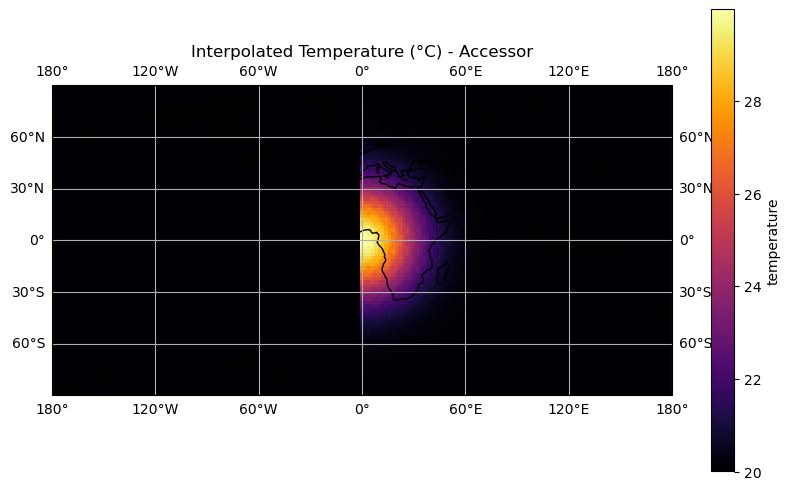

In [21]:
# Interpolate temperature to a regular grid using the accessor
grid_data = ds_accessor.temperature.hutil.interpolate_to_grid(
    lat_res=2.0, lon_res=2.0,
    method='nearest'
)

# Plot the interpolated data
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
im = grid_data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='inferno')
ax.coastlines()
ax.gridlines(draw_labels=True)
plt.title('Interpolated Temperature (°C) - Accessor')
plt.show()

### Using the Smart Select Function with the Accessor

The `select` method on the accessor also automatically chooses the appropriate selection method based on the input parameters.

In [22]:
# Select at a latitude using the accessor
lat_data = ds_accessor.hutil.select(lat=0)
print(f'Selected {len(lat_data.cell)} points at latitude 0°')

# Select at a longitude using the accessor
lon_data = ds_accessor.hutil.select(lon=0)
print(f'Selected {len(lon_data.cell)} points at longitude 0°')

# Select at a point using the accessor
point_data = ds_accessor.hutil.select(lat=0, lon=0)
print(f'Selected {len(point_data.cell)} points at (0°, 0°)')

# Select a region using the accessor
region_data = ds_accessor.hutil.select(lat=slice(0, 45), lon=slice(0, 45))
print(f'Selected {len(region_data.cell)} points in region')

Selected 128 points at latitude 0°
Selected 32 points at longitude 0°


/home/suvarchal/hk25/hutil/hutil/selection.py:54: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  npix = ds.dims.get('cell')
<frozen _collections_abc>:807: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


TypeError: len() of unsized object

## Working with DataArrays

The hutil accessor also works with xarray DataArrays, not just Datasets.

Selected 384 temperature points at the equator


/home/suvarchal/hk25/hutil/hutil/selection.py:90: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  pixel_indices = np.arange(ds.dims['cell'])


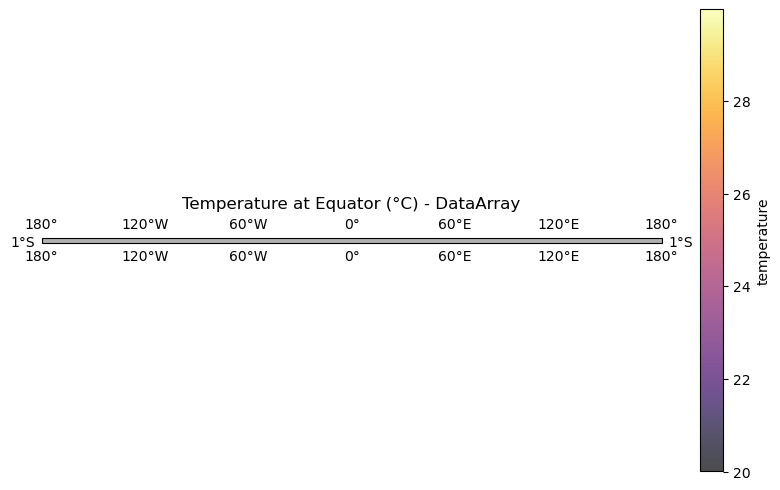

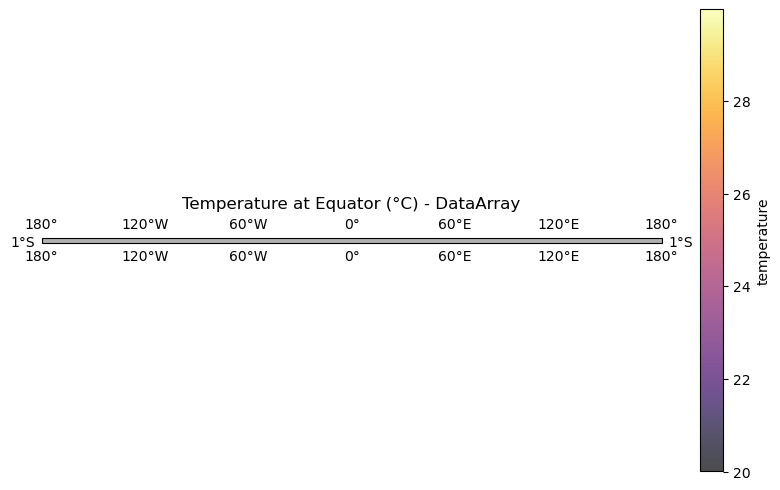

In [23]:
# Get a DataArray from the dataset
temperature = ds.temperature

# Add lat/lon coordinates using the accessor
temperature_with_latlon = temperature.hutil.add_latlon_coords()

# Select data at the equator using the accessor
equator_temp = temperature_with_latlon.hutil.select_at_latitude(latitude=0, tolerance=2.0)
print(f'Selected {len(equator_temp.cell)} temperature points at the equator')

# Plot the selected data
equator_temp.hutil.plot(title='Temperature at Equator (°C) - DataArray', cmap='inferno')

## Conclusion

This notebook has demonstrated the basic usage of the `hutil` package for working with HEALPix datasets in xarray. We've shown how to use the package both with direct function calls and with the xarray accessor, which provides a more convenient and intuitive interface for working with HEALPix data.